# Загрузим набор данных по [ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view)

In [178]:
import pandas as pd

url = 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view?usp=sharing'
dataset_url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Посмотрим описание набора данных и количество пустых ячеек

In [3]:
count_of_null_original = df.isna().sum().sum()
print(f'Количество пустых ячеек в исходном наборе = {count_of_null_original}')
df.describe()

Количество пустых ячеек в исходном наборе = 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Подготовим обучающий и тестовый наборы данных
Для тестового набора возьмем 25% данных

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=15)

# Для примера выведем разделение здоровых и больных диабетом по признакам SkinThickness и BMI

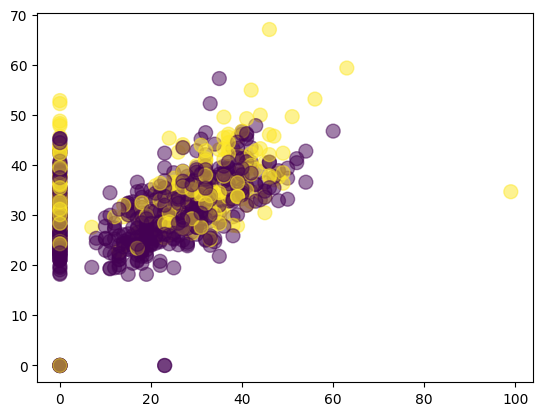

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X['SkinThickness'], X['BMI'], s=100, c=y, alpha=0.5)
plt.show()

# Метод k ближайших соседей

In [95]:
from sklearn.neighbors import KNeighborsClassifier

model_5 = KNeighborsClassifier(n_neighbors = 5)
model_5.fit(X_train,y_train)

model_10 = KNeighborsClassifier(n_neighbors = 10)
model_10.fit(X_train,y_train)

model_15 = KNeighborsClassifier(n_neighbors = 15)
model_15.fit(X_train,y_train)

model_20 = KNeighborsClassifier(n_neighbors = 20)
model_20.fit(X_train,y_train)

model_25 = KNeighborsClassifier(n_neighbors = 25)
model_25.fit(X_train,y_train)

accuracy_5 = model_5.score(X_test,y_test)
print(f'Точность полученной модели по 5ти соседям составляет {accuracy_5*100}%')

accuracy_10 = model_10.score(X_test,y_test)
print(f'Точность полученной модели по 10ти соседям составляет {accuracy_10*100}%')

accuracy_15 = model_15.score(X_test,y_test)
print(f'Точность полученной модели по 15ти соседям составляет {accuracy_15*100}%')

accuracy_20 = model_20.score(X_test,y_test)
print(f'Точность полученной модели по 20ти соседям составляет {accuracy_20*100}%')

accuracy_25 = model_25.score(X_test,y_test)
print(f'Точность полученной модели по 25ти соседям составляет {accuracy_25*100}%')

Точность полученной модели по 5ти соседям составляет 71.875%
Точность полученной модели по 10ти соседям составляет 74.47916666666666%
Точность полученной модели по 15ти соседям составляет 76.5625%
Точность полученной модели по 20ти соседям составляет 74.47916666666666%
Точность полученной модели по 25ти соседям составляет 76.04166666666666%


# С помощью обученной модели предскажем значения Outcome и выведем реальные и предсказанные данные на график для сравнения
(в качестве примера выведем для 5, 10 и 15 соседей)

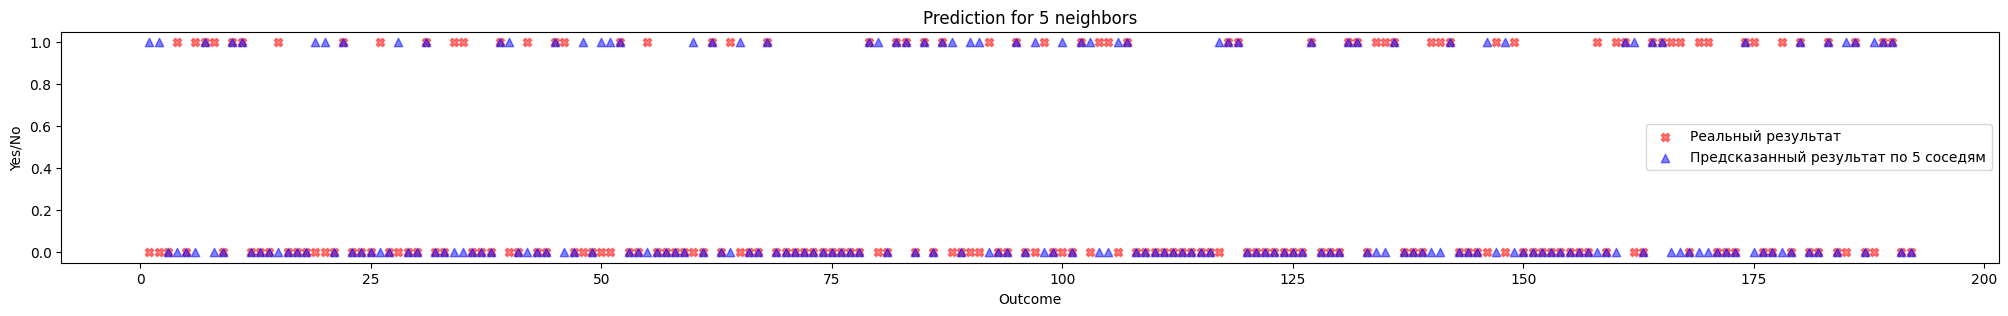

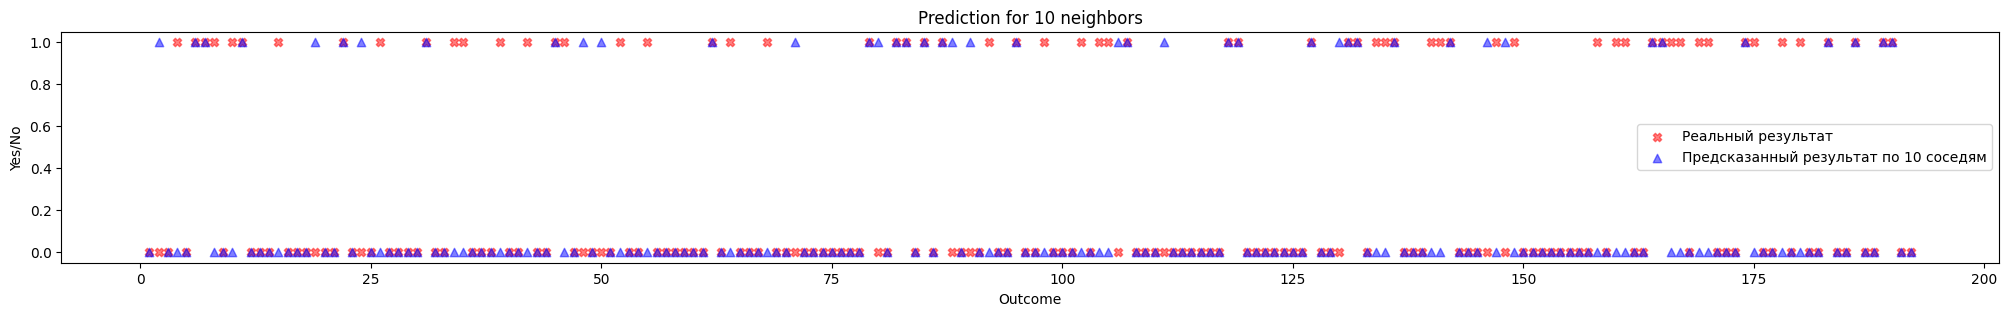

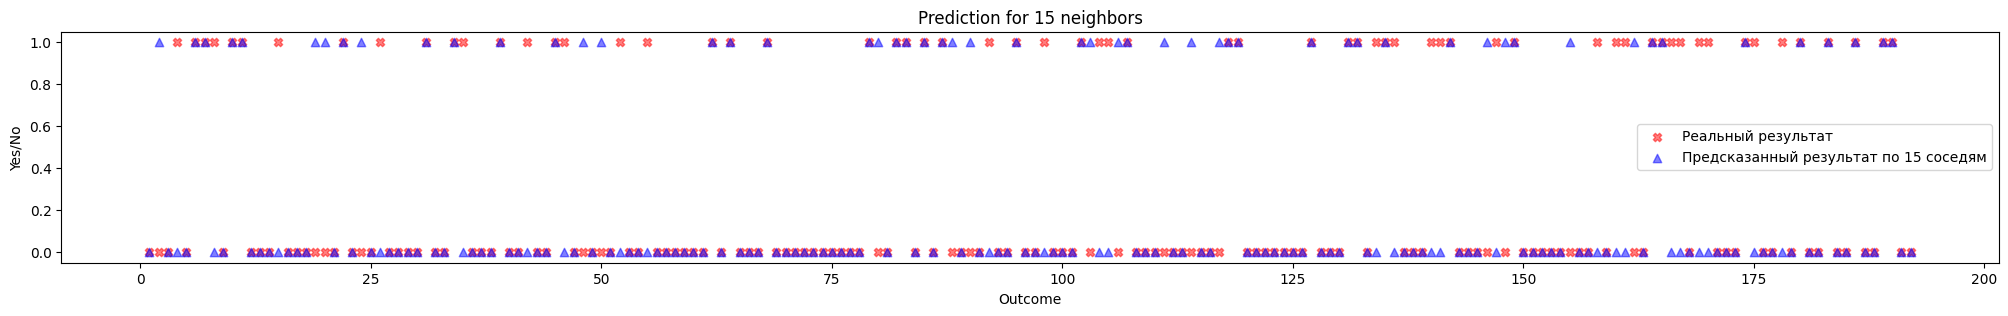

In [110]:
import matplotlib.pyplot as plt

y_pred_5 = model_5.predict(X_test)
c = [i for i in range (1,len(y_test)+1,1)]
plt.figure(figsize=(25,3))
plt.scatter(c,y_test,color='r',alpha=0.5, marker='X')
plt.scatter(c,y_pred_5,color='b',alpha=0.5, marker='^')
plt.legend(["Реальный результат", "Предсказанный результат по 5 соседям"], ncol = 1, loc = "center right")
plt.xlabel('Outcome')
plt.ylabel('Yes/No')
plt.title('Prediction for 5 neighbors')
# plt.show()

y_pred_10 = model_10.predict(X_test)
plt.figure(figsize=(25,3))
plt.scatter(c,y_test,color='r',alpha=0.5, marker='X')
plt.scatter(c,y_pred_10,color='b',alpha=0.5, marker='^')
plt.legend(["Реальный результат","Предсказанный результат по 10 соседям"], ncol = 1, loc = "center right")
plt.xlabel('Outcome')
plt.ylabel('Yes/No')
plt.title('Prediction for 10 neighbors')

y_pred_15 = model_15.predict(X_test)
plt.figure(figsize=(25,3))
plt.scatter(c,y_test,color='r',alpha=0.5, marker='X')
plt.scatter(c,y_pred_15,color='b',alpha=0.5, marker='^')
plt.legend(["Реальный результат","Предсказанный результат по 15 соседям"], ncol = 1, loc = "center right")
plt.xlabel('Outcome')
plt.ylabel('Yes/No')
plt.title('Prediction for 15 neighbors')

plt.show()

# Отобразим разделение классов на графике

*  используем признаки SkinThickness и BMI, а по остальным сделаем проекцию, так как отобразить можно только 2
*  для примера выведем полученные области для модели с 5, 20 и 25 соседями


In [ ]:
#!pip install mlxtend --upgrade --no-deps
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd

if isinstance(X, pd.DataFrame):
  X1 = X.to_numpy()
else:
  X1 = X

if isinstance(y, pd.Series):
  y = y.to_numpy()

plot_decision_regions(X1, y, clf=model_5, feature_index=[3,5],
                      filler_feature_values={0: 6, 1:148, 2:72, 4:0, 6:0.627, 7:50},  #these will be ignored
                      filler_feature_ranges={0: 5, 1: 80, 2: 20, 4: 80, 6: 1.5, 7: 20})
plt.title('5 neighbors')
plt.show()

plot_decision_regions(X1, y, clf=model_20, feature_index=[3,5],
                      filler_feature_values={0: 6, 1:148, 2:72, 4:0, 6:0.627, 7:50},  #these will be ignored
                      filler_feature_ranges={0: 5, 1: 80, 2: 20, 4: 80, 6: 1.5, 7: 20})
plt.title('20 neighbors')
plt.show()

plot_decision_regions(X1, y, clf=model_25, feature_index=[3,5],
                      filler_feature_values={0: 6, 1:148, 2:72, 4:0, 6:0.627, 7:50},  #these will be ignored
                      filler_feature_ranges={0: 5, 1: 80, 2: 20, 4: 80, 6: 1.5, 7: 20})
plt.title('25 neighbors')
plt.show()

# Метод множественной линейной регрессии

# Еще раз разделим набор данных
Но оставим только признаки SkinThickness и BMI, а в качестве зависимой переменной возьмем Insulin

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[['SkinThickness','BMI']]
y = df['Insulin']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=5000)

# Применение метода множественной линейной регресии

In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Определим качество полученной модели

In [145]:
accuracy_LR = model.score(X_test,y_test)
print(f'Точность полученной модели множественной линейной регрессии составляет {accuracy_LR*100}%')

y_pred = model.predict(X_test)
d = {'y_pred': y_pred, 'y_test': y_test, 'diff': np.abs(y_test - y_pred)}
pd.DataFrame(d)

Точность полученной модели множественной линейной регрессии составляет 17.285672924637197%


,y_pred,y_test,diff
574,105.970444,330,224.029556
658,17.349258,0,17.349258
41,17.699491,0,17.699491
288,63.728008,49,14.728008
703,17.203327,0,17.203327
...,...,...,...
532,176.133040,65,111.133040
590,141.250777,0,141.250777
625,159.879215,54,105.879215
692,114.678445,95,19.678445


# Выведем полученную зависимость для y

In [151]:
print('Intercept of the model:',model.intercept_)
print('Coefficient of the line:',model.coef_)
print(f'y = {str(model.intercept_)} + {str(model.coef_[0])}*x1 + {str(model.coef_[1])}*x2')

Intercept of the model: 5.966668918096758
Coefficient of the line: [3.04062503 0.29186125]
y = 5.966668918096758 + 3.040625029827045*x1 + 0.2918612522194128*x2


# SVM модель

# Еще раз выполним разделение и возьмем пару признаков, чтобы можно было вывести посмотреть в виде графика

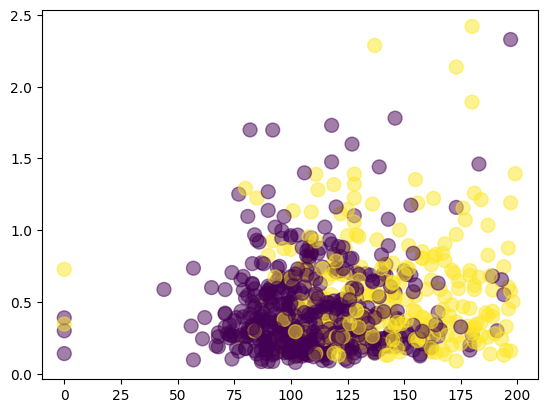

In [180]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df[['Glucose','DiabetesPedigreeFunction']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=155)


plt.scatter(X['Glucose'], X['DiabetesPedigreeFunction'], s=100, c=y, alpha=0.5)
plt.show()

In [176]:
import numpy as np
from sklearn import svm

svm_model = svm.SVC(kernel='poly', C = 1300)
svm_model.fit(X_train,y_train)
accuracy_SVM = svm_model.score(X_test,y_test)
print(f'Точность полученной модели машины опорных векторов составляет {accuracy_SVM*100}%')

Точность полученной модели машины опорных векторов составляет 72.07792207792207%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


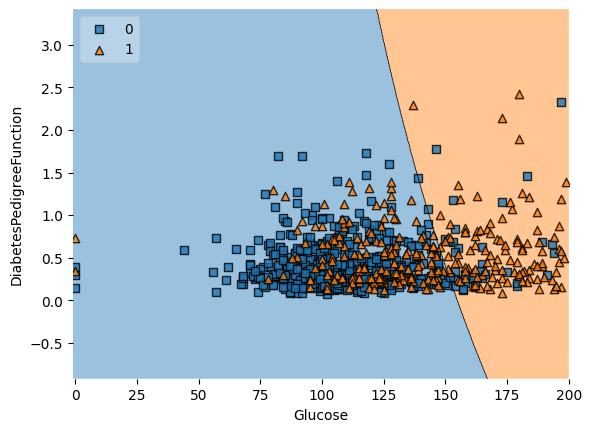

In [181]:
import numpy as np
import pandas as pd
from matplotlib import style
from mlxtend.plotting import plot_decision_regions

if isinstance(X, pd.DataFrame):
  X1 = X.to_numpy()
else:
  X1 = X

if isinstance(y, pd.Series):
  y = y.to_numpy()

plot_decision_regions(X1, y, clf=svm_model, legend=2)
plt.xlabel('Glucose')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()